<a href="https://colab.research.google.com/github/wallacecarlis/data_science/blob/main/PROJETO_2_ANALISE_DE_DADOS_VIOLENCIA_NO_RIO_DE_JANEIRO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

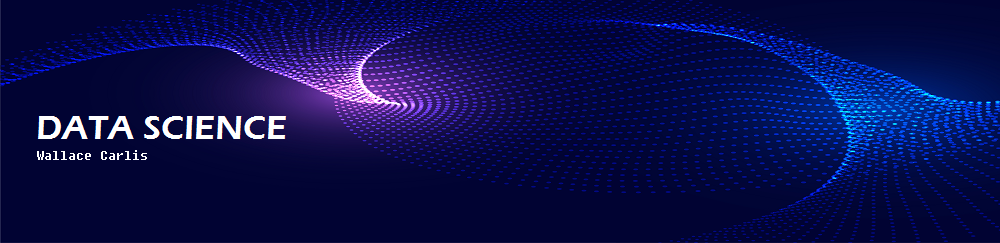

## **Projeto 2 - Análise de dados - Violência - Rio de Janeiro**

O **Rio de Janeiro** continua lindo, como diz a música. Sim, mas também continua **violento**, sendo um dos principais estados do país, que por sinal também é violento. O problema é ainda mais **crônico** quando olhamos para o **histórico** e verificamos a **detenção de políticos locais**, vários desses com associações a criminosos, que por sua vez não vivem apenas nos morros cariocas, pelo contrário.

Mesmo assim, vale lembrar que a **capital** do estado é um dos principais destinos **turísticos** do país, onde praias como **Copacabana e Ipanema** são conhecidades em nível **mundial**.

Vamos, portanto, **analisar** alguns dados sobre a **violência no Rio de Janeiro**.

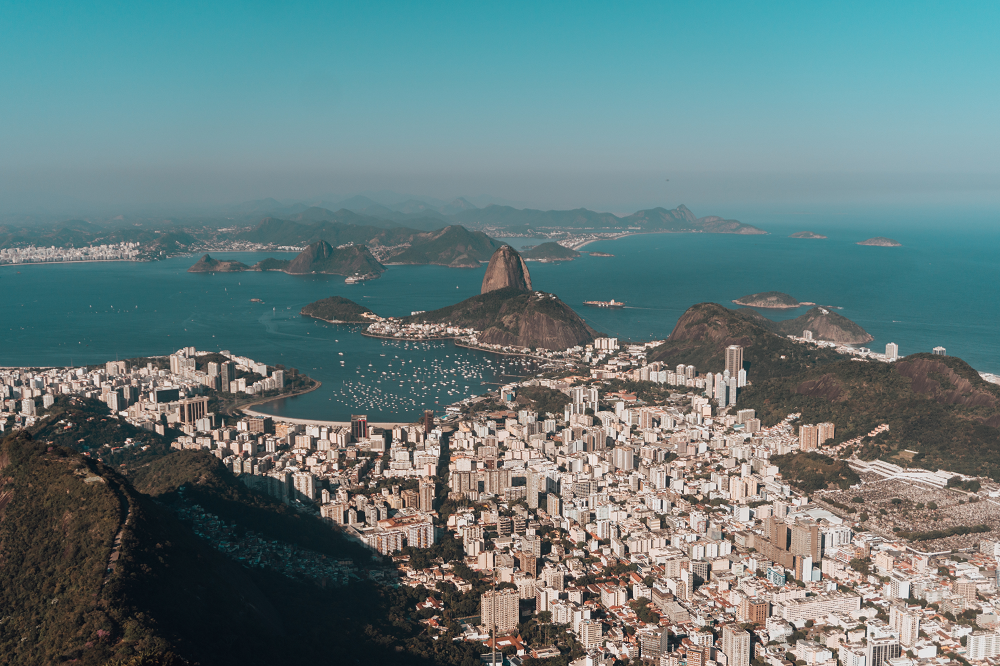

Utilizaremos os dados disponíveis no portal do [Instituto de Segurança Pública](http://www.ispdados.rj.gov.br/estatistica.html) (ISP), que disponibiliza diversos arquivos voltados para **informações estatísticas de segurança**. No caso do nosso projeto, o estudo será à partir de uma **série mensal** histórica desde **1991**.

Informação **relevante**, é de que antes de serem consolidados no **ISP**, os registros de ocorrência são submetidos ao controle de qualidade realizado pela **Corregedoria Geral de Polícia (CGPOL) da Secretaria de Estado de Polícia Civil**.

Vamos iniciar nosso projeto **importando** as bibliotecas necessárias para a **análise exploratória dos dados**.

In [15]:
# 1 - Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = "svg"
plt.rcParams["font.family"] = "sans-serif"

**Acessando** a base de dados:
- Iniciaremos verificando as principais informações da base de dados.

In [16]:
# 2 - Acessando a base de dados
df = pd.read_csv("https://raw.githubusercontent.com/wallacecarlis/arquivos_ml/main/violencia.csv")

In [17]:
# 3 - Verificando a quantidade de linhas e colunas
df.shape

(344, 56)

In [18]:
# 4 - Verificando os nomes das colunas
df.columns

Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
       'ind

In [19]:
# 5 - Verificando os tipos de dados das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   vano                        344 non-null    int64  
 1   mes                         344 non-null    int64  
 2   hom_doloso                  344 non-null    int64  
 3   lesao_corp_morte            248 non-null    float64
 4   latrocinio                  344 non-null    int64  
 5   hom_por_interv_policial     260 non-null    float64
 6   tentat_hom                  344 non-null    int64  
 7   lesao_corp_dolosa           344 non-null    int64  
 8   estupro                     200 non-null    float64
 9   hom_culposo                 260 non-null    float64
 10  lesao_corp_culposa          248 non-null    float64
 11  roubo_comercio              344 non-null    int64  
 12  roubo_residencia            344 non-null    int64  
 13  roubo_veiculo               344 non

O atribudo **shape** retorna a quantidade de linhas (no caso, meses), **344**, e a quantidade de colunas, **56**. Já o atributo **columns** nos traz o nome das colunas, e o método **info**, retorna o índice de cada coluna, seu nome, a quantidade de valores nulos e o tipo de dado de cada coluna. Importante também, será verificar a porcentagem de valores ausentes. Faremos isso utilizando o método **isnull**, a função **sum**, o atributo **shape**, e ordenaremos com o método **sort_values**. Portanto, as **primeiras colunas** são as que mais possuem **valores ausentes**.

In [20]:
# 6 - Verificando a porcentagem de valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending= False)

furto_bicicleta               0.802326
roubo_bicicleta               0.802326
cmba                          0.523256
posse_drogas                  0.523256
trafico_drogas                0.523256
apreensao_drogas_sem_autor    0.523256
apf                           0.523256
aaapai                        0.523256
cmp                           0.523256
furto_celular                 0.418605
sequestro_relampago           0.418605
extorsao                      0.418605
furto_coletivo                0.418605
roubo_apos_saque              0.418605
roubo_conducao_saque          0.418605
roubo_cx_eletronico           0.418605
estelionato                   0.418605
pol_militares_mortos_serv     0.418605
pol_civis_mortos_serv         0.418605
estupro                       0.418605
pessoas_desaparecidas         0.383721
encontro_ossada               0.383721
roubo_celular                 0.313953
registro_ocorrencias          0.279070
lesao_corp_morte              0.279070
sequestro                

Algumas considerações importantes após a visualização ordenada sobre os **valores ausentes**:

* As colunas **furto_bicicleta** e **roubos_bicicleta** possuem mais de **80%** de valores ausentes. Já **posse_drogas** e **trafico_drogas**, dentre outras, têm cerca de **50%** de dados ausentes. No caso, suas utilizações comprometem nossa análise;

* Já as colunas **furto_veiculos, roubo_veiculos**, **latrocínio**, **hom_doloso**, **roubo_carga**, **roubo_banco**, dentre outras, não possuem **valores ausentes**, ou seja, **possuem informações relevantes** que podemos utilizar para obtermos uma melhor compreensão dos dados em nossa análise.

In [21]:
# 7 - Visualizando as primeiras linhas da base de dados
df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,...,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,...,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,...,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,...,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,...,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,...,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


In [22]:
# 8 - Visualizando as últimas linhas da base de dados
df.tail()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,...,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
339,2019,4,360,1.0,11,124.0,466,5573,483.0,172.0,...,408.0,22,3.0,1.0,0.0,496,11040,3755,67797.0,3
340,2019,5,345,2.0,15,172.0,478,4958,465.0,145.0,...,390.0,20,1.0,0.0,0.0,534,11384,3649,68336.0,3
341,2019,6,332,3.0,8,153.0,436,4769,414.0,152.0,...,403.0,20,1.0,3.0,0.0,496,9551,3115,61202.0,3
342,2019,7,309,5.0,10,194.0,399,4740,402.0,140.0,...,400.0,32,7.0,0.0,0.0,518,10071,3198,65817.0,2
343,2019,8,318,1.0,6,170.0,457,4760,460.0,156.0,...,367.0,27,8.0,2.0,0.0,495,9912,3181,65285.0,2


Da base de dados original iremos criar uma cópia sem os **dados ausentes**, para facilitar nossa análise. Poderíamos realizar o **preenchimento** dos **valores ausentes** por diversas opções, entretanto, tal **tratamento não será objeto de estudo** para este projeto.

In [23]:
# 9 - Criando uma cópia sem valores NaN
df_copia = df.copy()
df_copia = df_copia.dropna(axis = 1)
df_copia.head()

,vano,mes,hom_doloso,latrocinio,tentat_hom,lesao_corp_dolosa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,...,furto_transeunte,outros_furtos,total_furtos,apreensao_drogas,recuperacao_veiculos,encontro_cadaver,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,fase
0,1991,1,657,15,162,3051,350,188,1174,63,...,1147,3561,6717,133,872,217,672,1348,1174,3
1,1991,2,732,17,175,3421,357,171,1097,64,...,1066,3309,6225,127,751,209,749,1395,1097,3
2,1991,3,713,25,216,3613,443,191,1265,71,...,1062,3573,6719,80,789,188,738,1385,1265,3
3,1991,4,634,20,200,3211,425,199,1415,81,...,1195,3290,6570,133,787,140,654,1540,1415,3
4,1991,5,650,20,146,3051,553,231,1449,82,...,723,3546,6454,163,845,78,670,1266,1449,3


Verificando o **resumo estatístico**:

- Uma vez que realizamos as **exclusões** necessárias, verificaremos o **resumo estatístico** para nossa primeira compreensão sobre seus **valores**. Utilizaremos o método **describe** para isso.

In [24]:
# 10 - Visualizando o resumo estatístico com o método describe
df_copia.describe().round()

,vano,mes,hom_doloso,latrocinio,tentat_hom,lesao_corp_dolosa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,...,furto_transeunte,outros_furtos,total_furtos,apreensao_drogas,recuperacao_veiculos,encontro_cadaver,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,fase
count,344.0,344.0,344.0,344.0,344.0,344.0,344.0,344.0,344.0,344.0,...,344.0,344.0,344.0,344.0,344.0,344.0,344.0,344.0,344.0,344.0
mean,2005.0,6.0,505.0,16.0,318.0,5493.0,455.0,133.0,2449.0,340.0,...,1519.0,5994.0,10433.0,1072.0,1772.0,66.0,578.0,4735.0,2449.0,3.0
std,8.0,3.0,114.0,6.0,128.0,1514.0,120.0,44.0,790.0,224.0,...,972.0,1965.0,3697.0,643.0,657.0,34.0,105.0,3204.0,790.0,0.0
min,1991.0,1.0,272.0,2.0,122.0,2350.0,243.0,49.0,1097.0,59.0,...,322.0,2322.0,4691.0,80.0,729.0,0.0,334.0,1086.0,1097.0,2.0
25%,1998.0,3.0,414.0,11.0,200.0,4067.0,366.0,104.0,1890.0,208.0,...,732.0,3978.0,6700.0,714.0,1277.0,42.0,500.0,1557.0,1890.0,3.0
50%,2005.0,6.0,507.0,15.0,318.0,5830.0,434.0,125.0,2322.0,286.0,...,1076.0,6559.0,10448.0,980.0,1755.0,60.0,590.0,4190.0,2322.0,3.0
75%,2012.0,9.0,577.0,19.0,398.0,6582.0,536.0,151.0,2778.0,401.0,...,2334.0,7602.0,13878.0,1546.0,2202.0,87.0,649.0,6873.0,2778.0,3.0
max,2019.0,12.0,831.0,36.0,645.0,9050.0,914.0,300.0,5358.0,1329.0,...,5368.0,9880.0,18003.0,2543.0,3695.0,217.0,848.0,13833.0,5358.0,3.0


Com base nas informações sobre os dados que temos disponíveis podemos olhar para algumas questões prioritárias quando abordamos violência, a **própria vida** e o **bem material** subtraído. Sendo assim, verificamos os dados das colunas **hom_doloso**, **latrocinio**, **roubo_veiculo** e **roubo_carga**.


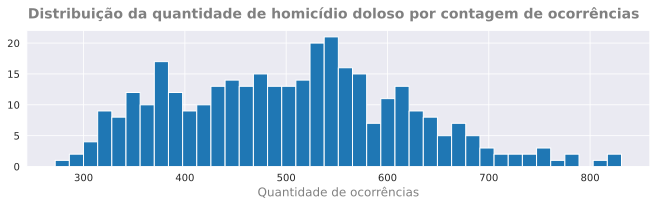

In [25]:
# 11 - Histograma da coluna "hom_doloso"
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize = (10, 3), dpi = 150)
ax.hist("hom_doloso", data = df_copia, bins = 40)
ax.text(245, 24, "Distribuição da quantidade de homicídio doloso por contagem de ocorrências",
        fontsize = 14, fontweight = "semibold", color = "grey")
ax.set_xlabel("Quantidade de ocorrências", fontsize = 12, color = "grey")
plt.tight_layout()

O gráfico de histograma acima nos traz uma grande concentração quantidade de homicídios dolosos por quantidade de ocorrências. Por exemplo, em mais de **20 vezes** ocorreram cerca de **570 homicídios dolosos**.

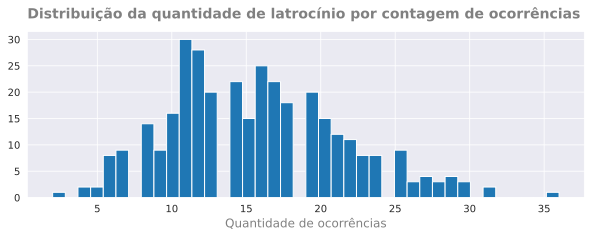

In [26]:
# 12 - Histograma da coluna "latrocinio"
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize = (10, 3), dpi = 150)
ax.hist("latrocinio", data = df_copia, bins = 40)
ax.text(0.3, 34, "Distribuição da quantidade de latrocínio por contagem de ocorrências",
        fontsize = 14, fontweight = "semibold", color = "grey")
ax.set_xlabel("Quantidade de ocorrências", fontsize = 12, color = "grey")
plt.show()

Já a distribuição de **latrocínio** por quantidade de ocorrências traz a informação de que ocorreram cerca de **30 vezes** a quantidade de cerca de **12 latrocínios**.

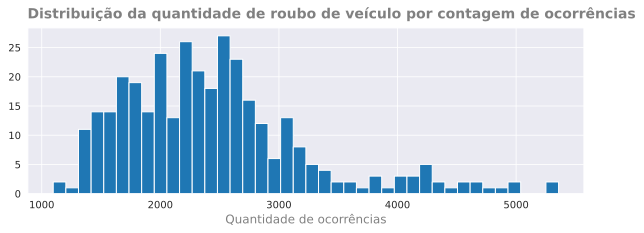

In [27]:
# 13 - Histograma da coluna "roubo_veiculo"
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize = (10, 3), dpi = 150)
ax.hist("roubo_veiculo", data = df_copia, bins = 40)
ax.text(880, 30, "Distribuição da quantidade de roubo de veículo por contagem de ocorrências",
        fontsize = 14, fontweight = "semibold", color = "grey")
ax.set_xlabel("Quantidade de ocorrências", fontsize = 12, color = "grey")
plt.show()

Já a quantidade de **roubo de veículos** apresenta uma grande distribuição entre um pouco mais de **1000** e um pouco menos de **3000**. Ou seja, em mais de **20 vezes**, pelo menos **2000 veículos** foram roubados.

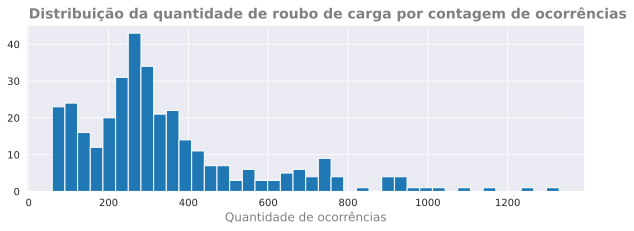

In [28]:
# 14 - Histograma da coluna "roubo_carga"
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize = (10, 3), dpi = 150)
ax.hist("roubo_carga", data = df_copia, bins = 40)
ax.text(0, 47, "Distribuição da quantidade de roubo de carga por contagem de ocorrências",
        fontsize = 14, fontweight = "semibold", color = "grey")
ax.set_xlabel("Quantidade de ocorrências", fontsize = 12, color = "grey")
plt.show()

**Linha do tempo**:
- Homicídios dolosos
- Latrocínios
- Roubo de veículos
- Roubos de carga

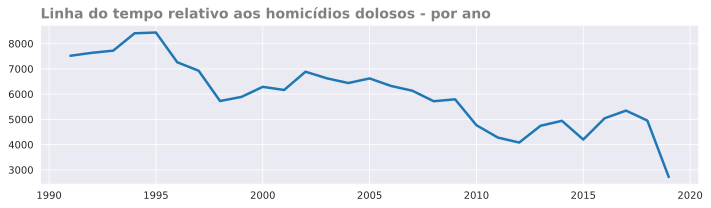

In [29]:
# 15 - Visualizando a linha do tempo relativo ao homicídio doloso
mensal = df_copia.groupby("vano")["hom_doloso"].sum()
mensal = pd.DataFrame(mensal)
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize = (10, 3), dpi = 150)
mensal["hom_doloso"].plot(kind = "line", ax = ax, lw = 2.5)
ax.text(1989.6, 9000, "Linha do tempo relativo aos homicídios dolosos - por ano", fontsize = 14, fontweight = "semibold", color = "grey")
ax.set_xlabel("")
plt.tight_layout()

É visível a **tendência** de queda com relação aos **homicídios dolosos** registrados desde **1991**. Pode ser devido à diversas questões, desde **diminuição efetiva** à correção de lançamento de informações. Contudo, houve **queda** neste item.

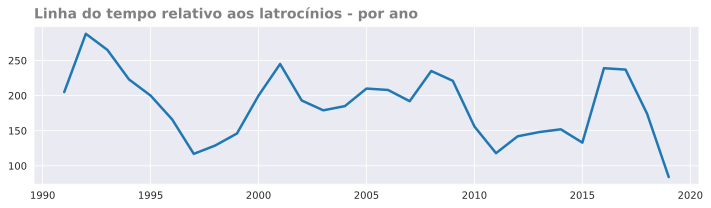

In [30]:
# 16 - Visualizando a linha do tempo relativo ao latrocinio
mensal = df_copia.groupby("vano")["latrocinio"].sum()
mensal = pd.DataFrame(mensal)
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize = (10, 3), dpi = 150)
mensal["latrocinio"].plot(kind = "line", ax = ax, lw = 2.5)
ax.text(1989.6, 310, "Linha do tempo relativo aos latrocínios - por ano", fontsize = 14, fontweight = "semibold", color = "grey")
ax.set_xlabel("")
plt.tight_layout()

Já com relação aos **latrocínios**, o gráfico acima nos mostra uma **aleatoriedade**, com **picos e quedas** de ocorrências.

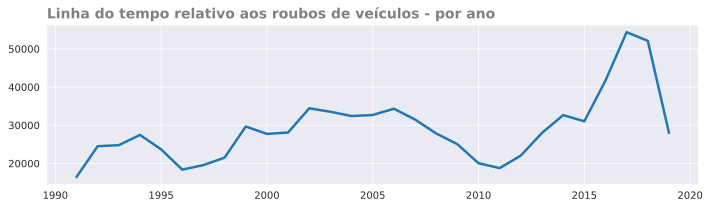

In [31]:
# 17 - Visualizando a linha do tempo relativo ao roubo de veículos
mensal = df_copia.groupby("vano")["roubo_veiculo"].sum()
mensal = pd.DataFrame(mensal)
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize = (10, 3), dpi = 150)
mensal["roubo_veiculo"].plot(kind = "line", ax = ax, lw = 2.5)
ax.text(1989.6, 58000, "Linha do tempo relativo aos roubos de veículos - por ano", fontsize = 14, fontweight = "semibold", color = "grey")
ax.set_xlabel("")
plt.tight_layout()

No caso de **roubo de veículos** houve **dois** momentos de crescimento, no início dos anos **2000**, e logo após **2015**.

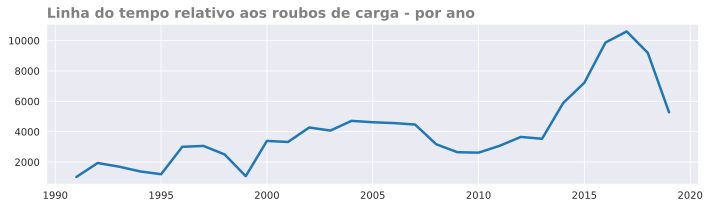

In [32]:
# 18 - Visualizando a linha do tempo relativo ao roubo de carga
mensal = df_copia.groupby("vano")["roubo_carga"].sum()
mensal = pd.DataFrame(mensal)
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize = (10, 3), dpi = 150)
mensal["roubo_carga"].plot(kind = "line", ax = ax, lw = 2.5)
ax.text(1989.6, 11500, "Linha do tempo relativo aos roubos de carga - por ano", fontsize = 14, fontweight = "semibold", color = "grey")
ax.set_xlabel("")
plt.tight_layout()

**Roubos de carga** tiveram um **crescimento** significativo perto de **2015**.

Por fim, criaremos algumas variáveis para verificar suas **correlações**.

In [33]:
# 19 - Criando matrizes de correlação
matriz_corr_1 = df_copia[["hom_doloso", "latrocinio", "indicador_letalidade"]].corr()
matriz_corr_2 = df_copia[["roubo_veiculo", "roubo_carga", "indicador_letalidade"]].corr()
matriz_corr_3 = df_copia[["roubo_em_coletivo", "hom_doloso", "latrocinio"]].corr()
matriz_corr_4 = df_copia[["roubo_banco", "hom_doloso", "latrocinio"]].corr()

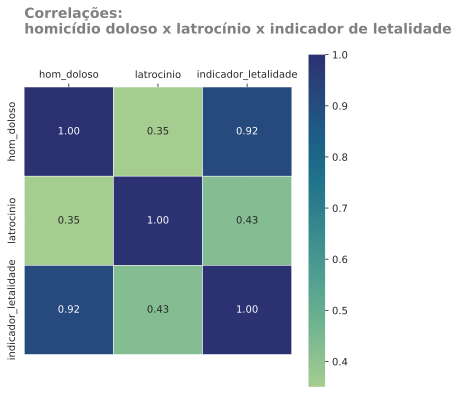

In [34]:
# 20 - Plotando um heat map a partir da matriz entre homicídio doloso, latrocínio e indicador de letalidade
fig, ax = plt.subplots(figsize = (6,6))
sns.heatmap(matriz_corr_1, cmap= "crest",
            fmt= ".2f", square= True,
            linewidths= 0.5, vmax= 1.0,
            linecolor = "white", annot= True, ax = ax)

ax.text(0, -0.6, "Correlações: \nhomicídio doloso x latrocínio x indicador de letalidade",
        fontsize = 14, fontweight = "semibold", color = "grey")

ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()
ax.set_title("")
plt.show();

Podemos verificar uma **correlação** positiva muito forte entre **homicídio doloso** e **indicador de letalidade**. A associação é óbvia, mas merecia sua visualização para melhor compreensão deste indicador.

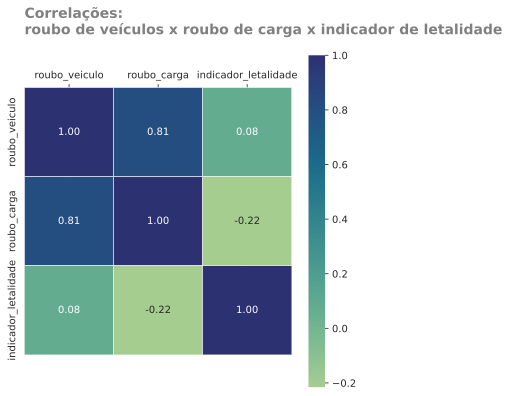

In [35]:
# 21 - Plotando um heat map a partir das correlações
fig, ax = plt.subplots(figsize = (6,6))
sns.heatmap(matriz_corr_2, cmap= "crest",
            fmt= ".2f", square= True,
            linewidths= 0.5, vmax= 1.0,
            linecolor = "white", annot= True, ax = ax)

ax.text(0, -0.6, "Correlações: \nroubo de veículos x roubo de carga x indicador de letalidade",
        fontsize = 14, fontweight = "semibold", color = "grey")

ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()
ax.set_title("")
plt.show();

Assim também é possível verificar a **correlação** positiva muito forte entre os roubos de **veículo e carga**.

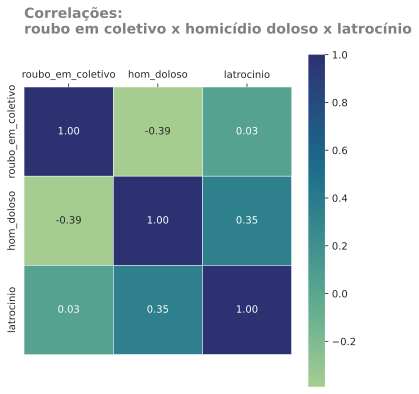

In [36]:
# 22 - Plotando um heat map a partir das correlações entre roubo em coletivo, homicídio doloso e latrocínio
fig, ax = plt.subplots(figsize = (6,6))
sns.heatmap(matriz_corr_3, cmap= "crest",
            fmt= ".2f", square= True,
            linewidths= 0.5, vmax= 1.0,
            linecolor = "white", annot= True, ax = ax)

ax.text(0, -0.6, "Correlações: \nroubo em coletivo x homicídio doloso x latrocínio",
        fontsize = 14, fontweight = "semibold", color = "grey")

ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()
ax.set_title("")
plt.show();

Dado interessante, nos **roubos em coletivos** praticamente não existe **correlação** com **homicídio doloso ou latrocínio**.

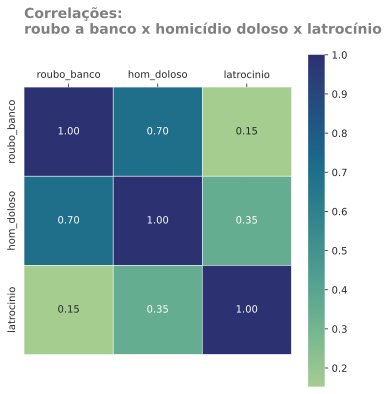

In [37]:
# 23 - Plotando um heat map a partir das correlações entre roubo a banco, homicídio doloso e latrocínio
fig, ax = plt.subplots(figsize = (6,6))
sns.heatmap(matriz_corr_4, cmap= "crest",
            fmt= ".2f", square= True,
            linewidths= 0.5, vmax= 1.0,
            linecolor = "white", annot= True, ax = ax)

ax.text(0, -0.6, "Correlações: \nroubo a banco x homicídio doloso x latrocínio",
        fontsize = 14, fontweight = "semibold", color = "grey")

ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()
ax.set_title("")
plt.show();

Neste caso percebemos uma **correlação** positiva forte entre **roubo a banco** e **homicídio doloso**.

**Concluindo**:

Infelizmente, históricamente o **Brasil** é um país **violento**, antes mesmo de seu descobrimento pelos **europeus**, portanto, as **tribos indígenas não viviam pacificamente**. Sendo assim, uma das principais capitais do país não fugiria à regra. O **Rio de Janeiro é muito violento**.

Com isso em mente, fica perceptível verificar o crescimento de **roubos de veículos e carga** nos últimos anos, bem como a correlação entre **homicídios dolosos e roubos a bancos**. Ou seja, é extremamente arriscado à vida presenciar um assalto a banco. Já o mesmo índice cai quando tentamos correlacionar **homicídio doloso e latrocínio com roubos em coletivo**. Segundo a análise, **perde-se o bem**, mas **ganha-se a vida**. Ainda assim, tenebroso.

Para outras leituras e análises, acesse meu [Medium](https://wallacecarlis.medium.com/).